### **INITIAL DATA EXPLORATION**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv(r"C:\Users\Abhinay\OneDrive\Documents\Infosys\Master_train.csv")

In [48]:
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [49]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [50]:
df.describe()  # lists out all columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
df.iloc[100]  #specific row (100th row)

Item_Identifier                          FDT28
Item_Weight                               13.3
Item_Fat_Content                       Low Fat
Item_Visibility                       0.063695
Item_Type                         Frozen Foods
Item_MRP                              151.0708
Outlet_Identifier                       OUT045
Outlet_Establishment_Year                 2002
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    1805.6496
Name: 100, dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [53]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
df.shape

(8523, 12)

In [55]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [57]:

#Task 1 - Data Visualization

print("Distribution of Sales by Item Type\n")
# Grouping data by 'Item_Type' and summing the sales to get total sales for each item type
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
print("\nSales by Item Type:\n", item_sales)

Distribution of Sales by Item Type


Sales by Item Type:
 Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64


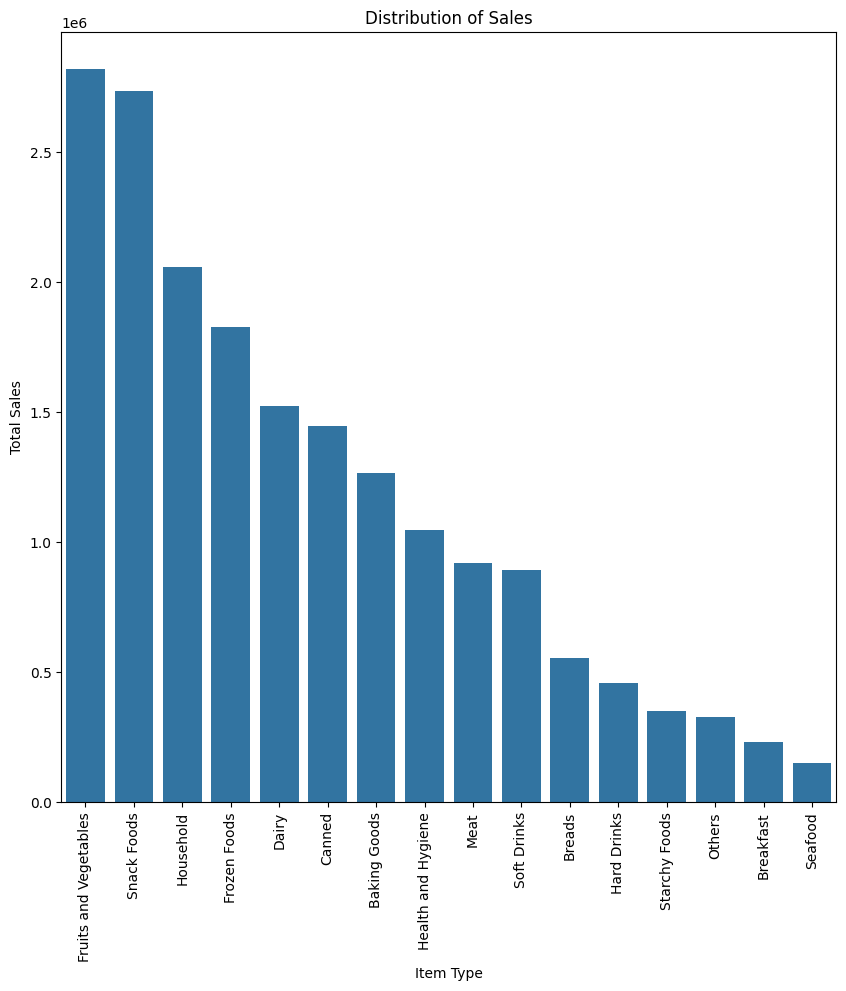

In [58]:
# Bar Plot 
plt.figure(figsize=(10,10))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.xticks(rotation=90)
plt.title('Distribution of Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

## **Observation:**

In [59]:

# The observation tells about the most and least sold items.

most_item_type = item_sales.idxmax()
least_item_type = item_sales.idxmin()
print(f"The item type '{most_item_type}' has the highest sales and '{least_item_type}' has least sales.")

The item type 'Fruits and Vegetables' has the highest sales and 'Seafood' has least sales.
